In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import pandas as pd
import warnings
import time, datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [2]:
import pandas as pd
import numpy as np

business_class= pd.read_csv('D:/IDMP/Final_Project/FlightPricePrediction/data/business.csv')
economy_class = pd.read_csv('D:/IDMP/Final_Project/FlightPricePrediction/data/economy.csv')

business_class['class']='Business'
economy_class['class']='Economy'

print(business_class)
print(economy_class)

             date    airline ch_code  num_code dep_time     from time_taken  \
0      11-02-2022  Air India      AI       868    18:00    Delhi    02h 00m   
1      11-02-2022  Air India      AI       624    19:00    Delhi    02h 15m   
2      11-02-2022  Air India      AI       531    20:00    Delhi    24h 45m   
3      11-02-2022  Air India      AI       839    21:25    Delhi    26h 30m   
4      11-02-2022  Air India      AI       544    17:15    Delhi    06h 40m   
...           ...        ...     ...       ...      ...      ...        ...   
93482  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022    Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022    Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022    Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   

                                                   

In [3]:
flight_data = pd.concat([business_class, economy_class])


In [4]:
# Reset the index
flight_data = flight_data.reset_index(drop=True)
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


In [5]:
flight_data['flight_number'] = flight_data['ch_code'] + '-' + flight_data['num_code'].astype(str)


In [6]:
flight_data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_number
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business,AI-868
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business,AI-624
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business,AI-531
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business,AI-839
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business,AI-544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy,UK-832
300257,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy,UK-832
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640",Economy,UK-826
300259,31-03-2022,Vistara,UK,822,9:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640",Economy,UK-822


In [6]:
flight_data = flight_data.drop(['ch_code', 'num_code'], axis=1)


In [8]:
flight_data

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_number
0,11-02-2022,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business,AI-868
1,11-02-2022,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business,AI-624
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business,AI-531
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business,AI-839
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business,AI-544
...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy,UK-832
300257,31-03-2022,Vistara,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy,UK-832
300258,31-03-2022,Vistara,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640",Economy,UK-826
300259,31-03-2022,Vistara,9:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640",Economy,UK-822


In [9]:
print(flight_data.isnull().sum().sum())


0


In [21]:
print(flight_data['airline'].unique())


['Air India' 'Vistara' 'SpiceJet' 'AirAsia' 'GO FIRST' 'Indigo' 'Trujet'
 'StarAir']


In [7]:
flight_data['stop'] = flight_data['stop'].replace(r'[\n\t]+', ' ', regex=True)


In [8]:
flight_data['stop'] = flight_data['stop'].apply(lambda x: x.split(' Via ')[0])


In [9]:
mapping_dict = {'non-stop ': 'zero',
                '1-stop': 'one',
                '1-stop ': 'one',
                '2+-stop': 'two_or_more'}

flight_data['stop'] = flight_data['stop'].replace(mapping_dict)

In [10]:
from datetime import datetime
flight_data['date'] = flight_data['date'].replace(r'/', '-', regex=True)
flight_data['date'] = pd.to_datetime(flight_data['date'], format='%d-%m-%Y')

particular_date = datetime.strptime('10-02-2022', '%d-%m-%Y')

flight_data['days_left'] = (flight_data['date'] - particular_date).dt.days

print(flight_data)


             date    airline dep_time     from time_taken  stop arr_time  \
0      2022-02-11  Air India    18:00    Delhi    02h 00m  zero    20:00   
1      2022-02-11  Air India    19:00    Delhi    02h 15m  zero    21:15   
2      2022-02-11  Air India    20:00    Delhi    24h 45m   one    20:45   
3      2022-02-11  Air India    21:25    Delhi    26h 30m   one    23:55   
4      2022-02-11  Air India    17:15    Delhi    06h 40m   one    23:55   
...           ...        ...      ...      ...        ...   ...      ...   
300256 2022-03-31    Vistara     7:05  Chennai    13h 50m   one    20:55   
300257 2022-03-31    Vistara     7:05  Chennai    13h 50m   one    20:55   
300258 2022-03-31    Vistara    12:30  Chennai    20h 35m   one     9:05   
300259 2022-03-31    Vistara     9:45  Chennai    23h 20m   one     9:05   
300260 2022-03-31    Vistara    20:30  Chennai    24h 25m   one    20:55   

               to   price     class flight_number  days_left  
0          Mumbai  25,61

In [15]:
flight_data

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_number,days_left
0,2022-02-11,Air India,18:00,Delhi,02h 00m,zero,20:00,Mumbai,"25,612",Business,AI-868,1
1,2022-02-11,Air India,19:00,Delhi,02h 15m,zero,21:15,Mumbai,"25,612",Business,AI-624,1
2,2022-02-11,Air India,20:00,Delhi,24h 45m,one,20:45,Mumbai,"42,220",Business,AI-531,1
3,2022-02-11,Air India,21:25,Delhi,26h 30m,one,23:55,Mumbai,"44,450",Business,AI-839,1
4,2022-02-11,Air India,17:15,Delhi,06h 40m,one,23:55,Mumbai,"46,690",Business,AI-544,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,7:05,Chennai,13h 50m,one,20:55,Hyderabad,"7,697",Economy,UK-832,49
300257,2022-03-31,Vistara,7:05,Chennai,13h 50m,one,20:55,Hyderabad,"7,709",Economy,UK-832,49
300258,2022-03-31,Vistara,12:30,Chennai,20h 35m,one,9:05,Hyderabad,"8,640",Economy,UK-826,49
300259,2022-03-31,Vistara,9:45,Chennai,23h 20m,one,9:05,Hyderabad,"8,640",Economy,UK-822,49


In [11]:
def get_time_category(dep_time):
    dep_hour = int(dep_time.split(':')[0])
    
    if dep_hour >= 4 and dep_hour < 6:
        return 'Early_Morning'
    elif dep_hour >= 6 and dep_hour < 12:
        return 'Morning'
    elif dep_hour >= 12 and dep_hour < 16:
        return 'Afternoon'
    elif dep_hour >= 16 and dep_hour < 22:
        return 'Evening'
    else:
        return 'Night'

In [12]:
flight_data['dep_time'] = flight_data['dep_time'].apply(get_time_category)
flight_data['arr_time'] = flight_data['arr_time'].apply(get_time_category)
flight_data

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_number,days_left
0,2022-02-11,Air India,Evening,Delhi,02h 00m,zero,Evening,Mumbai,"25,612",Business,AI-868,1
1,2022-02-11,Air India,Evening,Delhi,02h 15m,zero,Evening,Mumbai,"25,612",Business,AI-624,1
2,2022-02-11,Air India,Evening,Delhi,24h 45m,one,Evening,Mumbai,"42,220",Business,AI-531,1
3,2022-02-11,Air India,Evening,Delhi,26h 30m,one,Night,Mumbai,"44,450",Business,AI-839,1
4,2022-02-11,Air India,Evening,Delhi,06h 40m,one,Night,Mumbai,"46,690",Business,AI-544,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,Morning,Chennai,13h 50m,one,Evening,Hyderabad,"7,697",Economy,UK-832,49
300257,2022-03-31,Vistara,Morning,Chennai,13h 50m,one,Evening,Hyderabad,"7,709",Economy,UK-832,49
300258,2022-03-31,Vistara,Afternoon,Chennai,20h 35m,one,Morning,Hyderabad,"8,640",Economy,UK-826,49
300259,2022-03-31,Vistara,Morning,Chennai,23h 20m,one,Morning,Hyderabad,"8,640",Economy,UK-822,49


In [13]:
flight_data[['hours', 'minutes']] = flight_data['time_taken'].str.extract('(\d+)h\s*(\d+)m')
flight_data['hours'] = pd.to_numeric(flight_data['hours'])
flight_data['minutes'] = pd.to_numeric(flight_data['minutes'])
flight_data['duration'] = flight_data['hours'] + flight_data['minutes']/60
flight_data = flight_data.drop(columns=['hours', 'minutes','time_taken','date'])

flight_data
flight_data.dtypes
flight_data['price'] = flight_data['price'].str.replace(',', '').astype(int)
flight_data=flight_data.dropna()

Text(0.5, 1.0, 'Flight Price vs Airline')

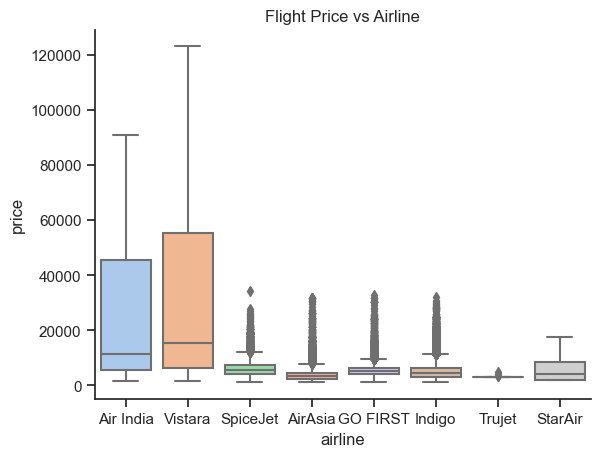

In [22]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="airline", y="price", data=flight_data)
sns.set_theme()
sns.despine()
plt.title("Flight Price vs Airline")

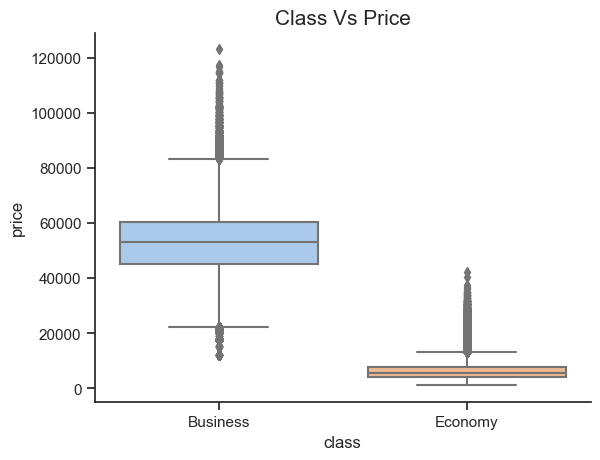

In [23]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='class',y='price',data=flight_data)
plt.title('Class Vs Price',fontsize=15)
sns.set_theme()
sns.despine()
plt.show()

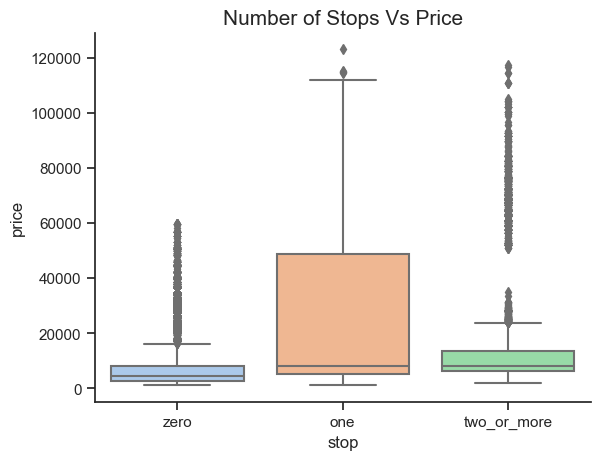

In [24]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='stop',y='price',data=flight_data)
plt.title('Number of Stops Vs Price',fontsize=15)
sns.set_theme()
sns.despine()
plt.show()

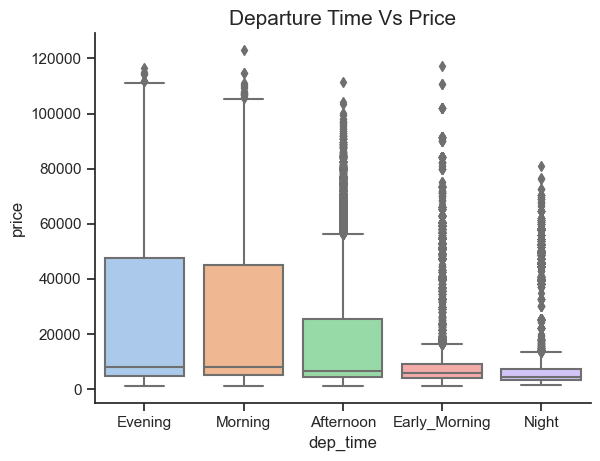

In [27]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='dep_time',y='price',data=flight_data)
plt.title('Departure Time Vs Price',fontsize=15)
sns.set_theme()
sns.despine()
plt.show()

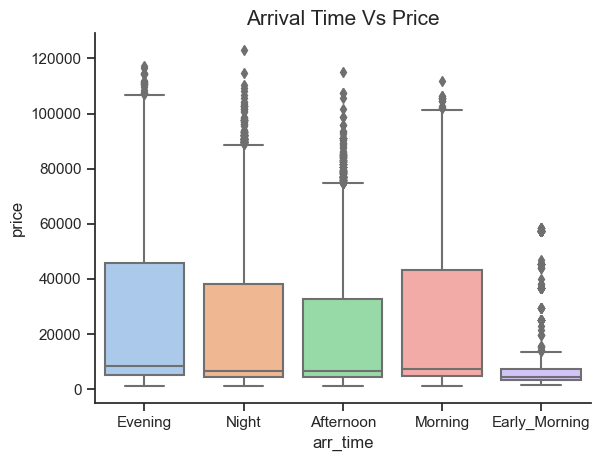

In [28]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='arr_time',y='price',data=flight_data)
plt.title('Arrival Time Vs Price',fontsize=15)
sns.set_theme()
sns.despine()
plt.show()

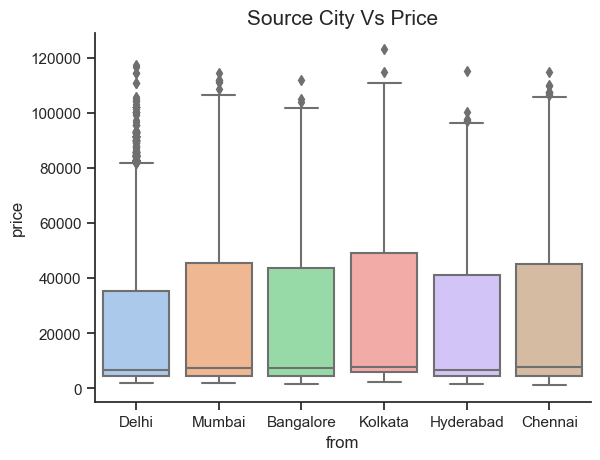

In [29]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='from',y='price',data=flight_data)
plt.title('Source City Vs Price',fontsize=15)
sns.set_theme()
sns.despine()
plt.show()

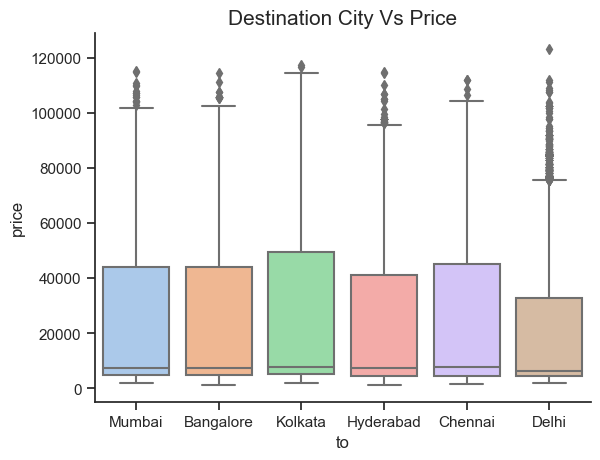

In [30]:
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='to',y='price',data=flight_data)
plt.title('Destination City Vs Price',fontsize=15)
sns.set_theme()
sns.despine()
plt.show()

Text(0.5, 1.0, 'Flight Price vs Days Left')

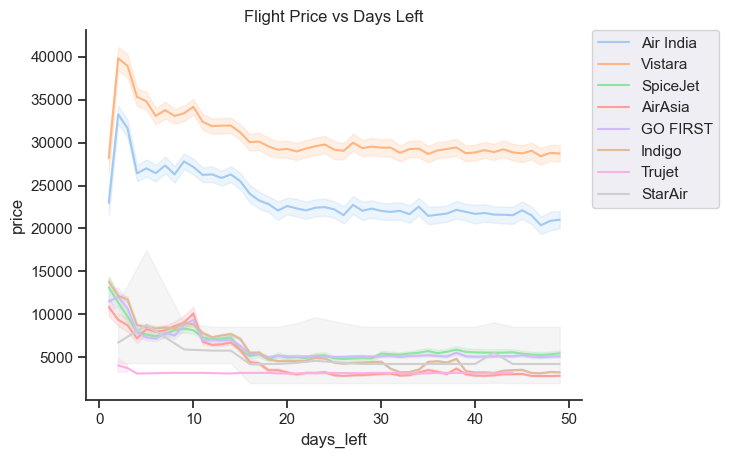

In [25]:
import matplotlib.pyplot as plt
custom_theme = sns.set_theme(style="ticks", palette="pastel")
sns.lineplot(x="days_left", y="price", data=flight_data, hue ='airline')
sns.set_theme()
sns.despine()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Flight Price vs Days Left")

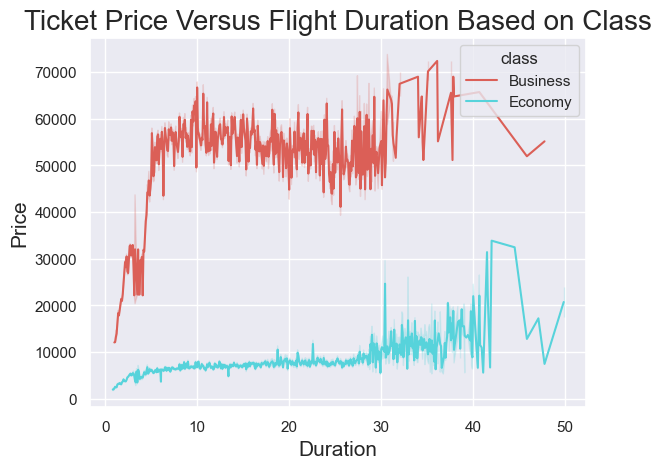

In [32]:
sns.lineplot(data=flight_data,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [20]:
# unix_timestamps = flight_data['date'].values.astype(np.int64) // 10 ** 9

# # Convert the Unix timestamps to float64 format
# float_timestamps = unix_timestamps.astype(np.float64) / 10 ** 9
# flight_data['date'] = pd.to_datetime(flight_data['date']).astype(float)
# flight_data['date'] = pd.to_numeric(flight_data['date'], errors='coerce')
# flight_data['date']

In [21]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in flight_data.columns:
    if flight_data[col].dtype=='object':
        flight_data[col]=le.fit_transform(flight_data[col])
        print(col)


airline
dep_time
from
stop
arr_time
to
class
flight_number


In [22]:
#splitting dependent and independent variables
x_var = flight_data.drop(['price'],axis=1)
y_var = flight_data['price']


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_var,y_var,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210179, 10), (90078, 10), (210179,), (90078,))

In [24]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test) 

In [25]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the dataset into training and testing sets
# Use 75% of the data for training and 25% for testing
# Set random_state to 42 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.30, random_state=42)

# Print the shape of the resulting arrays
# This displays the shape of the training and testing data arrays for both x and y
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (210179, 10)
Shape of x_test: (90078, 10)
Shape of y_train: (210179,)
Shape of y_test: (90078,)


In [26]:
flight_data.dropna(axis=0)

,airline,dep_time,from,stop,arr_time,to,price,class,flight_number,days_left,duration
0,0,2,2,2,2,5,25612,0,877,1,2.000000
1,0,2,2,2,2,5,25612,0,795,1,2.250000
2,0,2,2,0,2,5,42220,0,762,1,24.750000
3,0,2,2,0,4,5,44450,0,871,1,26.500000
4,0,2,2,0,4,5,46690,0,770,1,6.666667
...,...,...,...,...,...,...,...,...,...,...,...
300256,7,3,1,0,2,3,7697,1,1494,49,13.833333
300257,7,3,1,0,2,3,7709,1,1494,49,13.833333
300258,7,0,1,0,3,3,8640,1,1489,49,20.583333
300259,7,3,1,0,3,3,8640,1,1485,49,23.333333


In [27]:
x_train.isna().sum()


airline          0
dep_time         0
from             0
stop             0
arr_time         0
to               0
class            0
flight_number    0
days_left        0
duration         0
dtype: int64

In [28]:
y_train.isna().sum()

0

In [29]:
def predict_model_attributes(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    maep_tr = mean_absolute_percentage_error(y_train,y_pred)
    r2_tr  = r2_score(y_train,y_pred)
    y_pred1 = model.predict(x_test)
    maep_te = mean_absolute_percentage_error(y_test,y_pred1)
    r2_te  = r2_score(y_test,y_pred1)
    return print(f"""At Training: \n%MAE: {maep_tr}\nR2_Score: {r2_tr}
    \nAt Testing: \n%MAE: {maep_te}\nR2_Score: {r2_te}""")

In [30]:
lin_reg = LinearRegression()
predict_model_attributes(lin_reg)
print("*"*50)

At Training: 
%MAE: 0.44062897959601854
R2_Score: 0.9052785756750091
    
At Testing: 
%MAE: 0.43837970591321324
R2_Score: 0.9038492483146349
**************************************************


In [31]:
rand_for_reg = RandomForestRegressor()
predict_model_attributes(rand_for_reg)
print("*"*50)

At Training: 
%MAE: 0.0226511626547349
R2_Score: 0.9984456851996558
    
At Testing: 
%MAE: 0.06093041498887405
R2_Score: 0.9894079902833527
**************************************************


In [32]:
xg_boost_reg = XGBRegressor()
predict_model_attributes(xg_boost_reg)
print("*"*50)

At Training: 
%MAE: 0.13014667458692894
R2_Score: 0.9839699467583414
    
At Testing: 
%MAE: 0.13263610354935695
R2_Score: 0.982802492860628
**************************************************


In [33]:
extra_tree_reg = ExtraTreesRegressor()
predict_model_attributes(extra_tree_reg)
print("*"*50)

At Training: 
%MAE: 0.0004188279125118475
R2_Score: 0.999919713945589
    
At Testing: 
%MAE: 0.06416270079893024
R2_Score: 0.9877661623710068
**************************************************


In [34]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

modelmlg = LinearRegression()
modelrfr = RandomForestRegressor()
modelXGR = xgb.XGBRegressor()



MM = [modelmlg, modelrfr, modelXGR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean A

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4662.525
Mean Squared Error (MSE): 49460187.84
Root Mean Squared Error (RMSE): 7032.794
R2_score: 0.903849
Root Mean Squared Log Error (RMSLE): 8.858
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 898.154
Mean Squared Error (MSE): 5443602.095
Root Mean Squared Error (RMSE): 2333.153
R2_score: 0.989418
Root Mean Squared Log Error (RMSLE): 7.755
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_chil